# Demo


The purpose of this notebook is to create a minimum working example of seaglider data in OG1 format. The test case is to convert sg015 data from the Labrador Sea in September 2004.

- OG1 format is a newly agreed format (since June 2024) for glider data sets from various platforms (e.g., Seaglider, Slocum, Seaexplorer).  It lives on github here: (https://github.com/OceanGlidersCommunity/OG-format-user-manual).
- OG1 manual: https://oceangliderscommunity.github.io/OG-format-user-manual/OG_Format.html


In [1]:
import sys
import importlib
sys.path.append('/Users/eddifying/Cloudfree/gitlab-cloudfree/seagliderOG1')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from seagliderOG1 import fetchers
from seagliderOG1 import tools
from seagliderOG1 import plotters
from seagliderOG1 import vocabularies
import xarray as xr
import os

## Load Seaglider data in native format

This has three ways to load a glider dataset.

Load an example dataset using `seagliderOG1.fetchers.load_sample_dataset`

Alternatively, use your own with e.g. `ds = xr.open_dataset('/path/to/yourfile.nc')`

### Load a sample dataset

These data are hosted (currently) on dropbox.

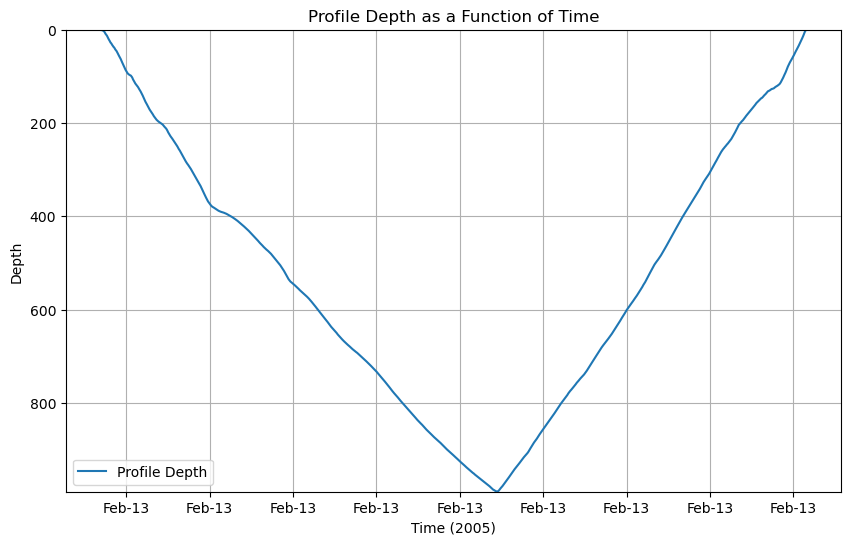

In [3]:
# List of available datasets
file_list = ['p0150500_20050213.nc', 'p0150501_20050213.nc', 'p0150502_20050214.nc', 'p0150503_20050214.nc', 'p0150504_20050215.nc'];

# Loads one dataset (p0150500_20050213.nc)
ds = fetchers.load_sample_dataset()

# Check the results
plotters.plot_profile_depth(ds)
#plotters.show_variables_xarray(ds)

### Load dataset from local machine

- For local data in the directory `input_dir`
- Creates a plot of ctd_depth against ctd_time.


/Users/eddifying/micromamba/envs/glidertest_env/lib/python3.12/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/Users/eddifying/micromamba/envs/glidertest_env/lib/python3.12/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


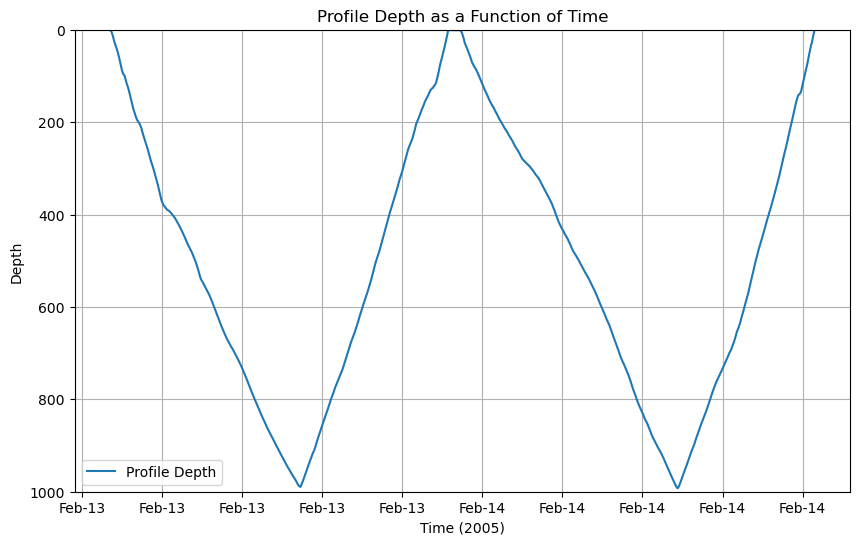

information is based on xarray Dataset


,dims,units,comment,standard_name
name,,,,
CTD_qc,sg_data_point,,Whether to trust the corrected CTD values,
GPS1_qc,sg_data_point,,Whether to trust the GPS1 information,
GPS2_qc,sg_data_point,,Whether to trust the GPS2 information,
GPSE_qc,sg_data_point,,Whether to trust the final GPS information,
avg_latitude,sg_data_point,degrees_north,The average latitude of the dive,
buoyancy,sg_data_point,g,"Buoyancy of vehicle, corrected for compression effects",
conductivity,sg_data_point,S/m,Conductivity corrected for anomalies,sea_water_electrical_conductivity
conductivity_qc,sg_data_point,,Whether to trust each corrected conductivity value,
conductivity_raw,sg_data_point,S/m,Uncorrected conductivity,


In [4]:
# Specify the input directory on your local machine
input_dir = "/Users/eddifying/Dropbox/data/sg015-ncei-download"

# Load and concatenate all datasets in the input directory
# Optionally, specify the range of profiles to load (start_profile, end_profile)
ds_all = fetchers.load_dataset(input_dir, start_profile=500, end_profile=501)

# Simple plot of depth against time
plotters.plot_profile_depth(ds_all)
plotters.show_contents(ds_all)

### Load data from the NCEI server

- Data from the sg015 mission in the Labrador Sea (https://www.ncei.noaa.gov/access/metadata/landing-page/bin/iso?id=gov.noaa.nodc:0111844), dataset identifier gov.noaa.nodc:0111844.


/Users/eddifying/micromamba/envs/glidertest_env/lib/python3.12/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/Users/eddifying/micromamba/envs/glidertest_env/lib/python3.12/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


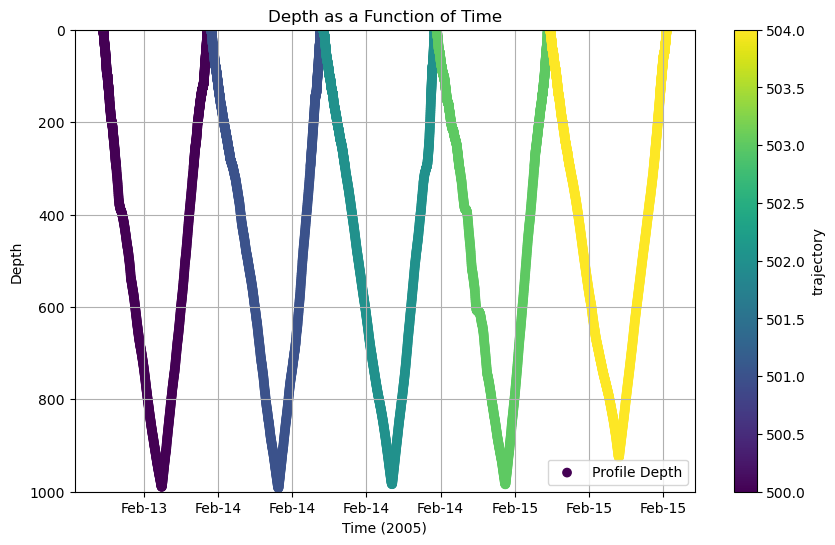

In [5]:
# Specify the server where data are located
server = "https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/015/20040924/"

# This was necessary to get an initial file list
# mylist = fetchers.list_files_in_https_server(server)
# fetchers.create_pooch_registry_from_directory("/Users/eddifying/Dropbox/data/sg015-ncei-download/")

# Load and concatenate all datasets from the server, optionally specifying the range of profiles to load
ds_all = fetchers.load_dataset(server, start_profile=500, end_profile=504)

#plotters.show_contents(ds_all)
# Simple plot of depth against time
plotters.plot_depth_colored(ds_all, color_by='trajectory')#

## Reformat into OG1

### Check the attributes in the basestation file


In [6]:
file_list = ['p0150500_20050213.nc', 'p0150501_20050213.nc', 'p0150502_20050214.nc', 'p0150503_20050214.nc', 'p0150504_20050215.nc'];
input_dir = "/Users/eddifying/Dropbox/data/sg015-ncei-download" 
filenames = input_dir + "/" + file_list[0]

# Show the result
plotters.show_contents(filenames,'attrs')


information is based on file: /Users/eddifying/Dropbox/data/sg015-ncei-download/p0150500_20050213.nc


,Attribute,Value
0,quality_control_version,1.1
1,base_station_micro_version,3705
2,time_coverage_resolution,PT1S
3,geospatial_vertical_max,989.698459
4,sea_name,Labrador Sea
5,mission,1
6,geospatial_lat_units,degrees
7,geospatial_lon_units,degrees
8,references,"Frajka-Williams, E.F. and P.B.Rhines 2009: Phy..."
9,seaglider_software_version,66.050003


# Manual check of changes

In [7]:
# Check what we're going to delete in concatenating datasets with fetchers.load_dataset()

# Load everything from the raw basestation file
def load_netcdf_file(source, profile_number=500):

    if source.startswith("http://") or source.startswith("https://"):
        # Create a Pooch object to manage the remote files
        data_source_online = pooch.create(
            path=pooch.os_cache("seagliderOG1_online"),
            base_url=source,
            registry=None,
        )
    filenames = []
    datasets = []

    for file in file_list:
        if file.endswith(".nc"):
            file_profile_num = int(file.split("_")[0][4:])
            if file_profile_num == profile_number:
                    filenames.append(file)            

    for file in filenames:
        if source.startswith("http://") or source.startswith("https://"):
            ds = fetchers.load_sample_dataset(file)
        else:
            ds = xr.open_dataset(os.path.join(source, file))

    return ds

# Load one dataset
file_list = ['p0150500_20050213.nc']
filenames = input_dir + "/" + file_list[0]
ds = load_netcdf_file(input_dir, 500)

# Separate what will be dropped in fetchers.load_dataset()
#non_data = extract_non_sg_data_point_vars(ds)
#print(non_data)

# Check what dimensions they correspond to (everything without dimension sg_data_point is dropped)
new_ds = fetchers.extract_non_sg_data_point_vars(ds)
#plotters.show_contents(new_ds)

# Show the keys (dimension names)
print(new_ds.keys())

# What variables are these?
plotters.show_variables_by_dimension(ds, dimension_name='trajectory')

# Some variables (like dive_number stored in 'trajectory' should be repeated for each sg_data_point)
# Extract the value of the variable with dimensions of trajectory
trajectory_var = ds['trajectory'].values

# Expand its length to match sg_data_point
expanded_trajectory_var = np.repeat(trajectory_var, ds.dims['sg_data_point'])

# Insert it as a new variable in the ds dataset with dimension sg_data_point
ds['trajectory_new'] = (['sg_data_point'], expanded_trajectory_var)

# Other variables, like log_gps_lat and log_gps_lon should only appear at the nearest point in time
# This is done with the function fetchers.add_gps_coordinates()

# Example usage
#plotters.plot_depth_colored(ds, color_by='trajectory_new')

plotters.show_variables_by_dimension(ds, dimension_name='sg_data_point')


KeysView(<xarray.Dataset>
Dimensions:                       (gps_info: 3, gc_event: 140)
Dimensions without coordinates: gps_info, gc_event
Data variables: (12/172)
    surface_curr_north            float64 ...
    surface_curr_east             float64 ...
    start_of_climb_time           timedelta64[ns] ...
    sg_cal_volmax                 float64 ...
    sg_cal_vbd_min_cnts           int32 ...
    sg_cal_vbd_max_cnts           int32 ...
    ...                            ...
    directives                    |S47 ...
    depth_avg_curr_qc             |S1 ...
    GPSE_qc                       |S1 ...
    GPS2_qc                       |S1 ...
    GPS1_qc                       |S1 ...
    CTD_qc                        |S1 ...)
information is based on xarray Dataset
information is based on xarray Dataset


,dims,units,comment
name,,,
buoyancy,sg_data_point,g,"Buoyancy of vehicle, corrected for compression effects"
conductivity,sg_data_point,S/m,Conductivity corrected for anomalies
conductivity_qc,sg_data_point,,Whether to trust each corrected conductivity value
conductivity_raw,sg_data_point,S/m,Uncorrected conductivity
conductivity_raw_qc,sg_data_point,,Whether to trust each raw conductivity value
ctd_depth,sg_data_point,meters,CTD thermistor depth corrected for average latitude
ctd_time,sg_data_point,,Time of CTD sample in GMT epoch format
density,sg_data_point,g/m^3,Sea water potential density
depth,sg_data_point,meters,"Depth below the surface, corrected for average latitude"


In [ ]:
# Apply the function to ds
ds = fetchers.add_gps_coordinates(ds)

plotters.plot_ctd_depth_vs_time(ds_all)


# Now run the whole thing

### Load data

In [ ]:
# Specify the input directory on your local machine
input_dir = "/Users/eddifying/Dropbox/data/sg015-ncei-download"

# Load and concatenate all datasets in the input directory
# Optionally, specify the range of profiles to load (start_profile, end_profile)
ds_all = fetchers.load_dataset(input_dir, start_profile=500, end_profile=501)

### Assign new attributes

Some of the attributes in the basestation netcdf file can be translated fairly easily into the OG1 format.  This is done in `tools.modify_attributes`.  At present, the "extra" attributes are retained at the bottom of the list.


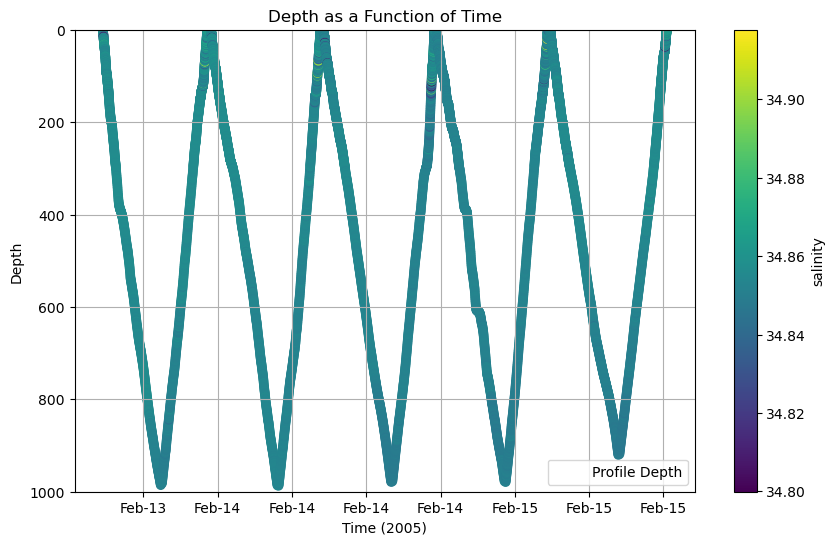

In [9]:
# Generate the dictionaries and lists to change the attributes
attr_to_add, attr_as_is, attr_to_change, attr_to_remove = tools.generate_attributes(ds_all)

# Assign new values to the attributes
ds_all = tools.modify_attributes(ds_all, attr_to_add, attr_as_is, attr_to_change, attr_to_remove)

# Show the result
#plotters.show_contents(ds_all)
plotters.plot_depth_colored(ds_all,'salinity')

### Rename variables

This conversion is incomplete.  See e.g., the tools.convert_to_og1() which is based on VOTO tools and not only names variables but also adds attributes to those variables.  This should be done instead of the "comments" which are in the basestation netcdf file.

In [ ]:
# Example usage
ds_renamed = tools.create_renamed_dataset(ds_all)
# Example usage
ds_renamed = tools.calc_Z(ds_renamed)

def list_variables_with_units(ds, unit):
    return [var for var in ds.data_vars if ds[var].attrs.get('units') == unit]

# Example usage
variables_with_cm_s_units = list_variables_with_units(ds_renamed, 'cm/s')
print(variables_with_cm_s_units)

# Convert cm/s to m/s for velocity
ds_renamed = tools.convert_velocity_units(ds_renamed, 'GLIDER_VERT_VELO_MODEL')
ds_renamed = tools.convert_velocity_units(ds_renamed, 'GLIDER_HORZ_VELO_MODEL')
ds_renamed = tools.convert_velocity_units(ds_renamed, 'GLIDE_SPEED')

plotters.show_contents(ds_renamed)


In [ ]:
print(list(ds_renamed))

## Check the final dataset

At the moment, since the plotters.show_attributes() and plotters.show_variables() are designed to work with netcdf files, I write the xarray dataset to netcdf before loading it and checking the attributes and variable names.

In [ ]:
ds_renamed['TIME'].attrs

In [ ]:

## Save the dataset to a NetCDF file
# Check if the file exists and delete it if it does
output_file = os.path.join('../data', 'test.nc')
if os.path.exists(output_file):
    os.remove(output_file)

output_file = os.path.join('../data', 'sg015_'+ds_renamed.start_date+'_delayed.nc')
if os.path.exists(output_file):
    os.remove(output_file)

# Save the dataset to a NetCDF file
ds_renamed.to_netcdf(output_file)

# Show the attributes of the saved NetCDF file
#plotters.show_contents(output_file,'vars')



In [ ]:
print(output_file)

ds = xr.open_dataset(output_file)

plotters.show_contents(ds)

In [ ]:
def plot_speeds(ds):
    fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

    # Plot horizontal speed
    ax[0].plot(ds['ctd_time'], ds['horz_speed'], label='Horizontal Speed', color='b')
    ax[0].set_ylabel('Horizontal Speed (m/s)')
    ax[0].legend()
    ax[0].grid(True)

    # Plot vertical speed
    ax[1].plot(ds['ctd_time'], ds['vert_speed'], label='Vertical Speed', color='r')
    ax[1].set_ylabel('Vertical Speed (m/s)')
    ax[1].set_xlabel('Time')
    ax[1].legend()
    ax[1].grid(True)

    plt.tight_layout()
    plt.show()

# Example usage
plot_speeds(ds_all)

In [ ]:
plt.figure(figsize=(10, 6))

# Plot PHASE against TIME
plt.plot(ds['TIME'], ds['PHASE'], 'b-', label='Phase')

plt.xlabel('Time')
plt.ylabel('Phase')
plt.legend()
plt.title('Phase vs Time')
plt.grid(True)
plt.show()